Your Full Name: 
    
`Arindam Choudhury`

    Nutan Mandale
    
    Humberto Gonzalez Granda

Your Uplevel Email Address:
    
    arindam.choudhury.email@gmail.com
    
    nutan.mandale@gmail.com
    
    HumbertoGonzalezGranda@gmail.com

Name of the Problem Statement of Submission:
    
    ShopTalk (Project-6)

In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

#### S3 Bucket name

In [2]:
load_dotenv()
ABO_BUCKET_NAME:      str = os.getenv("ABO_BUCKET_NAME")
YOUR_S3_BUCKET_NAME:  str = os.getenv("YOUR_S3_BUCKET_NAME")
ARTIFACTS_FOLDER:     str = os.getenv("ARTIFACTS_FOLDER")
EDA_FOLDER_NAME:      str = os.getenv("EDA_FOLDER_NAME")

#### Read the image meta dat file

In [3]:
i_meta_data_path = f"s3://{ABO_BUCKET_NAME}/images/metadata/images.csv.gz"
i_meta = pd.read_csv(i_meta_data_path)
i_meta.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [4]:
duplicates = i_meta[i_meta.duplicated()] # check for duplicates
print(duplicates)

Empty DataFrame
Columns: [image_id, height, width, path]
Index: []


#### EDA is done for one Listing metadata file

In [5]:
l_meta_data_path = f"s3://{ABO_BUCKET_NAME}/listings/metadata/listings_0.json.gz"
l_meta = pd.read_json(l_meta_data_path, lines=True)
l_meta.head(2)

,brand,bullet_point,color,item_id,item_name,model_name,model_number,model_year,product_type,style,...,item_weight,material,fabric_type,color_code,product_description,spin_id,3dmodel_id,pattern,finish_type,item_shape
0,"[{'language_tag': 'nl_NL', 'value': 'find.'}]","[{'language_tag': 'nl_NL', 'value': 'Schoen in...","[{'language_tag': 'nl_NL', 'value': 'Veelkleur...",B06X9STHNG,"[{'language_tag': 'nl_NL', 'value': 'Amazon-me...","[{'language_tag': 'nl_NL', 'value': '37753'}]",[{'value': '12-05-04'}],[{'value': 2017}],[{'value': 'SHOES'}],"[{'language_tag': 'nl_NL', 'value': 'Gesloten-...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'language_tag': 'es_MX', 'value': 'AmazonBas...","[{'language_tag': 'es_MX', 'value': 'White Pow...","[{'language_tag': 'es_MX', 'value': 'White Pow...",B07P8ML82R,"[{'language_tag': 'es_MX', 'value': '22"" Botto...",NaN,[{'value': 'AB5013-R22-10'}],NaN,[{'value': 'HARDWARE'}],"[{'language_tag': 'es_MX', 'value': '10 pares'}]",...,"[{'normalized_value': {'unit': 'pounds', 'valu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
i_meta.columns # check columns in image metadata

Index(['image_id', 'height', 'width', 'path'], dtype='object')

In [7]:
l_meta.columns # check columns in listing metadata

Index(['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'model_name',
       'model_number', 'model_year', 'product_type', 'style', 'main_image_id',
       'other_image_id', 'item_keywords', 'country', 'marketplace',
       'domain_name', 'node', 'item_dimensions', 'item_weight', 'material',
       'fabric_type', 'color_code', 'product_description', 'spin_id',
       '3dmodel_id', 'pattern', 'finish_type', 'item_shape'],
      dtype='object')

In [8]:
l_meta.item_name # get the item_name column

0       [{'language_tag': 'nl_NL', 'value': 'Amazon-me...
1       [{'language_tag': 'es_MX', 'value': '22" Botto...
2       [{'language_tag': 'en_AE', 'value': 'AmazonBas...
3       [{'language_tag': 'en_GB', 'value': 'Stone & B...
4       [{'language_tag': 'en_AU', 'value': 'The Fix A...
                              ...                        
9227    [{'language_tag': 'en_IN', 'value': 'Amazon Br...
9228    [{'language_tag': 'en_IN', 'value': 'Amazon Br...
9229    [{'language_tag': 'it_IT', 'value': 'Marchio A...
9230    [{'language_tag': 'en_IN', 'value': 'Amazon Br...
9231    [{'language_tag': 'nl_NL', 'value': 'AmazonBas...
Name: item_name, Length: 9232, dtype: object

In [9]:
l_meta['item_id'] # get the item_name column

0       B06X9STHNG
1       B07P8ML82R
2       B07H9GMYXS
3       B07CTPR73M
4       B01MTEI8M6
           ...    
9227    B085698QFP
9228    B07T5TF4M2
9229    B07PB4VSMY
9230    B0857LYNWH
9231    B00M92KO9Y
Name: item_id, Length: 9232, dtype: object

In [10]:
def func_in_en_us_(x): # Function to extract the english text from a list of dictionaries
    if isinstance(x, list):  # Check if x is a list before iterating
        us_texts = [item["value"] for item in x if item["language_tag"] == "en_US"]
        return us_texts[0] if us_texts else None
    else:
        return None

#### Get the items with English_US text if avialable..

In [11]:
l_meta = l_meta.assign(brand_in_en_us=l_meta.brand.apply(func_in_en_us_))
l_meta = l_meta.assign(bullet_point_in_en_us=l_meta.bullet_point.apply(func_in_en_us_))
l_meta = l_meta.assign(color_in_en_us=l_meta.color.apply(func_in_en_us_))
l_meta = l_meta.assign(fabric_type_in_en_us=l_meta.fabric_type.apply(func_in_en_us_))
l_meta = l_meta.assign(finish_type_in_en_us=l_meta.finish_type.apply(func_in_en_us_))
l_meta = l_meta.assign(item_keywords_in_en_us=l_meta.item_keywords.apply(func_in_en_us_))
l_meta = l_meta.assign(item_name_in_en_us=l_meta.item_name.apply(func_in_en_us_))
l_meta = l_meta.assign(item_shape_in_en_us=l_meta.item_shape.apply(func_in_en_us_))
l_meta = l_meta.assign(material_in_en_us=l_meta.material.apply(func_in_en_us_))
l_meta = l_meta.assign(model_name_in_en_us=l_meta.model_name.apply(func_in_en_us_))
l_meta = l_meta.assign(pattern_in_en_us=l_meta.pattern.apply(func_in_en_us_))
l_meta = l_meta.assign(product_description_in_en_us=l_meta.product_description.apply(func_in_en_us_)) 

print(f" number products with US English title: {len(l_meta)}")

l_meta.head(2)


 number products with US English title: 9232


,brand,bullet_point,color,item_id,item_name,model_name,model_number,model_year,product_type,style,...,color_in_en_us,fabric_type_in_en_us,finish_type_in_en_us,item_keywords_in_en_us,item_name_in_en_us,item_shape_in_en_us,material_in_en_us,model_name_in_en_us,pattern_in_en_us,product_description_in_en_us
0,"[{'language_tag': 'nl_NL', 'value': 'find.'}]","[{'language_tag': 'nl_NL', 'value': 'Schoen in...","[{'language_tag': 'nl_NL', 'value': 'Veelkleur...",B06X9STHNG,"[{'language_tag': 'nl_NL', 'value': 'Amazon-me...","[{'language_tag': 'nl_NL', 'value': '37753'}]",[{'value': '12-05-04'}],[{'value': 2017}],[{'value': 'SHOES'}],"[{'language_tag': 'nl_NL', 'value': 'Gesloten-...",...,None,None,None,None,None,None,None,None,None,None
1,"[{'language_tag': 'es_MX', 'value': 'AmazonBas...","[{'language_tag': 'es_MX', 'value': 'White Pow...","[{'language_tag': 'es_MX', 'value': 'White Pow...",B07P8ML82R,"[{'language_tag': 'es_MX', 'value': '22"" Botto...",NaN,[{'value': 'AB5013-R22-10'}],NaN,[{'value': 'HARDWARE'}],"[{'language_tag': 'es_MX', 'value': '10 pares'}]",...,None,None,None,None,None,None,None,None,None,None


In [12]:
l_meta = l_meta[~l_meta.item_name_in_en_us.isna()] # remove rows with missing item_name_in_en_us

In [13]:
l_meta.columns # get the columns of the dataframe including the new columns added with the english text

Index(['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'model_name',
       'model_number', 'model_year', 'product_type', 'style', 'main_image_id',
       'other_image_id', 'item_keywords', 'country', 'marketplace',
       'domain_name', 'node', 'item_dimensions', 'item_weight', 'material',
       'fabric_type', 'color_code', 'product_description', 'spin_id',
       '3dmodel_id', 'pattern', 'finish_type', 'item_shape', 'brand_in_en_us',
       'bullet_point_in_en_us', 'color_in_en_us', 'fabric_type_in_en_us',
       'finish_type_in_en_us', 'item_keywords_in_en_us', 'item_name_in_en_us',
       'item_shape_in_en_us', 'material_in_en_us', 'model_name_in_en_us',
       'pattern_in_en_us', 'product_description_in_en_us'],
      dtype='object')

#### Merge the image meta with lising meta to get the path of each image

In [14]:
dataset = l_meta.merge(i_meta, left_on="main_image_id", right_on="image_id")

In [15]:
dataset.columns # get the columns from the merged dataframe

Index(['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'model_name',
       'model_number', 'model_year', 'product_type', 'style', 'main_image_id',
       'other_image_id', 'item_keywords', 'country', 'marketplace',
       'domain_name', 'node', 'item_dimensions', 'item_weight', 'material',
       'fabric_type', 'color_code', 'product_description', 'spin_id',
       '3dmodel_id', 'pattern', 'finish_type', 'item_shape', 'brand_in_en_us',
       'bullet_point_in_en_us', 'color_in_en_us', 'fabric_type_in_en_us',
       'finish_type_in_en_us', 'item_keywords_in_en_us', 'item_name_in_en_us',
       'item_shape_in_en_us', 'material_in_en_us', 'model_name_in_en_us',
       'pattern_in_en_us', 'product_description_in_en_us', 'image_id',
       'height', 'width', 'path'],
      dtype='object')

#### Delete some columns which I will not be using 

In [16]:
dataset = dataset.drop(columns=['brand', 'bullet_point', 'color', 'fabric_type', 'finish_type', 'item_keywords', 
                              'item_name', 'item_shape', 'material', 'model_name', 'model_number', 'pattern', 
                              'product_description', 'style', 'node', 'model_year', 'item_dimensions', 'item_weight',
                              'image_id', 'main_image_id'])


In [17]:
dataset.head(2)

,item_id,product_type,other_image_id,country,marketplace,domain_name,color_code,spin_id,3dmodel_id,brand_in_en_us,...,item_keywords_in_en_us,item_name_in_en_us,item_shape_in_en_us,material_in_en_us,model_name_in_en_us,pattern_in_en_us,product_description_in_en_us,height,width,path
0,B0896LJNLH,[{'value': 'DRINKING_CUP'}],"[717gxIR99XL, 51fzW5BNdVL, 21xD1NzxObL]",US,Amazon,amazon.com,NaN,NaN,NaN,AmazonBasics,...,crystal,AmazonBasics Serene 16-Piece Old Fashioned and...,None,None,None,None,None,1197,894,07/075e5d67.jpg
1,B07HCR1LSQ,[{'value': 'EARRING'}],NaN,JP,Amazon,amazon.co.jp,NaN,NaN,NaN,None,...,None,[Find] Amazon Collection Platinum Plated Sterl...,None,None,None,None,None,1000,1000,c9/c923418f.jpg


In [18]:
dataset.columns # get the columns from the merged dataframe after dropping the columns

Index(['item_id', 'product_type', 'other_image_id', 'country', 'marketplace',
       'domain_name', 'color_code', 'spin_id', '3dmodel_id', 'brand_in_en_us',
       'bullet_point_in_en_us', 'color_in_en_us', 'fabric_type_in_en_us',
       'finish_type_in_en_us', 'item_keywords_in_en_us', 'item_name_in_en_us',
       'item_shape_in_en_us', 'material_in_en_us', 'model_name_in_en_us',
       'pattern_in_en_us', 'product_description_in_en_us', 'height', 'width',
       'path'],
      dtype='object')

#### Lets get the image path for other_image_id

In [19]:
dataset[['item_id', 'item_name_in_en_us', 'path', 'other_image_id']][0:5]

,item_id,item_name_in_en_us,path,other_image_id
0,B0896LJNLH,AmazonBasics Serene 16-Piece Old Fashioned and...,07/075e5d67.jpg,"[717gxIR99XL, 51fzW5BNdVL, 21xD1NzxObL]"
1,B07HCR1LSQ,[Find] Amazon Collection Platinum Plated Sterl...,c9/c923418f.jpg,NaN
2,B075DQBBJZ,Arizona Desert Sand Horizon Photo with Wood Ha...,c6/c6889ed4.jpg,"[91i0jTWScLL, 81GjBMtcfBL, 81rgshp4g4L]"
3,B07S74D9T7,AmazonBasics Adjustable Speaker Stand - 3.8 to...,2b/2b90e918.jpg,"[81fMrhXWHfL, 71gfY+SVZKL, 81FCuhRc-rL, 713pBn..."
4,B01N27SMXC,Amazon Brand - The Fix Women's Foley Tassel Sl...,2c/2c0416de.jpg,"[71kNNwo3PfL, 716vL8cWNNL, 61EmUPl6s3L, 71oreW..."


#### Create a function to get the path for other image ids

In [20]:
def func_image_path_(image_ids):
    if isinstance(image_ids, list):
        image_paths = [i_meta[i_meta["image_id"] == image_id]["path"].to_list()[0] for image_id in image_ids]
        return image_paths if image_paths else None
    else:
        return None  

#### Get image path

In [21]:
dataset = dataset.assign(other_image_id_path=dataset.other_image_id.apply(func_image_path_)) 

#### Now we have the path for other_image_id as well

In [22]:
dataset[['item_id', 'item_name_in_en_us', 'path', 'other_image_id', 'other_image_id_path']][0:5]

,item_id,item_name_in_en_us,path,other_image_id,other_image_id_path
0,B0896LJNLH,AmazonBasics Serene 16-Piece Old Fashioned and...,07/075e5d67.jpg,"[717gxIR99XL, 51fzW5BNdVL, 21xD1NzxObL]","[f2/f24e42d9.jpg, 2d/2da4a5ac.jpg, ed/ed444f23..."
1,B07HCR1LSQ,[Find] Amazon Collection Platinum Plated Sterl...,c9/c923418f.jpg,NaN,None
2,B075DQBBJZ,Arizona Desert Sand Horizon Photo with Wood Ha...,c6/c6889ed4.jpg,"[91i0jTWScLL, 81GjBMtcfBL, 81rgshp4g4L]","[43/4378ccb0.jpg, df/df6ea91e.jpg, 88/88675b16..."
3,B07S74D9T7,AmazonBasics Adjustable Speaker Stand - 3.8 to...,2b/2b90e918.jpg,"[81fMrhXWHfL, 71gfY+SVZKL, 81FCuhRc-rL, 713pBn...","[68/682a2a63.jpg, 69/69eb06dc.jpg, 91/9190b49c..."
4,B01N27SMXC,Amazon Brand - The Fix Women's Foley Tassel Sl...,2c/2c0416de.jpg,"[71kNNwo3PfL, 716vL8cWNNL, 61EmUPl6s3L, 71oreW...","[7f/7fe4036c.jpg, ec/ecb157f8.jpg, 10/106f6086..."


#### There are two numeric columns in the dataset (checking the distribution of the values)

In [23]:
dataset.describe()

,height,width
count,1649.000000,1649.000000
mean,1883.850212,1784.369921
std,730.090587,701.741091
min,159.000000,251.000000
25%,1066.000000,1193.000000
50%,2120.000000,1809.000000
75%,2560.000000,2560.000000
max,2560.000000,2560.000000


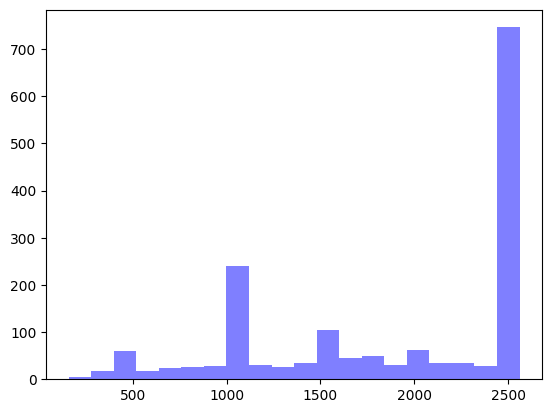

In [24]:
plt.hist(dataset['height'], bins=20, alpha=0.5, color='b', label='price')
plt.show()

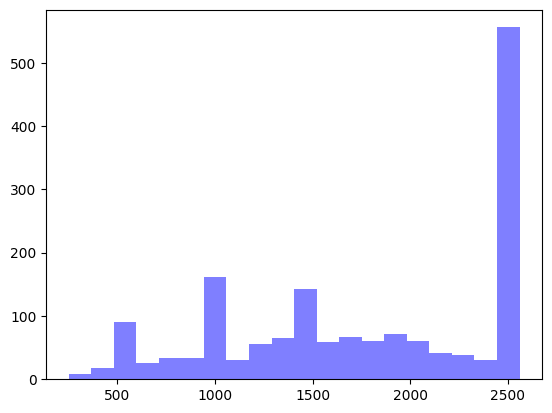

In [25]:
plt.hist(dataset['width'], bins=20, alpha=0.5, color='b', label='price')
plt.show()

[Most of the images are high resolution pixel 2500 X 2500]

#### Check the product country 

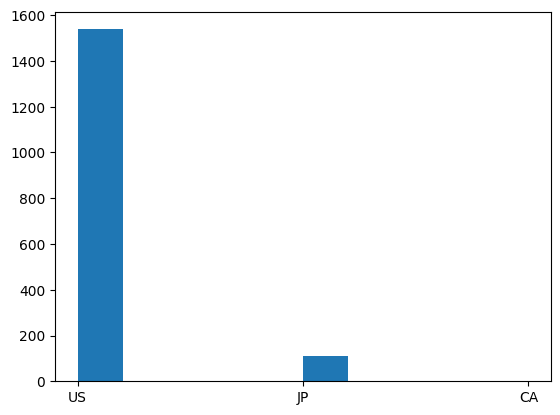

In [26]:
plt.hist(dataset['country'])
plt.show()

[Most of the products are US but few from Japan]

#### Lets create a JSON file with these data

In [27]:
dataset_json = dataset[0:1].to_json(orient="records")
print(dataset_json)

[{"item_id":"B0896LJNLH","product_type":[{"value":"DRINKING_CUP"}],"other_image_id":["717gxIR99XL","51fzW5BNdVL","21xD1NzxObL"],"country":"US","marketplace":"Amazon","domain_name":"amazon.com","color_code":null,"spin_id":null,"3dmodel_id":null,"brand_in_en_us":"AmazonBasics","bullet_point_in_en_us":"Lead-free glass: made of crystal-clear, lead-free glass for stunning clarity; keeps its shine through many washings; beautifully showcases beverages and adds a touch of glamour to any gathering","color_in_en_us":"Clear","fabric_type_in_en_us":null,"finish_type_in_en_us":null,"item_keywords_in_en_us":"crystal","item_name_in_en_us":"AmazonBasics Serene 16-Piece Old Fashioned and Coolers Glass Drinkware Set","item_shape_in_en_us":null,"material_in_en_us":null,"model_name_in_en_us":null,"pattern_in_en_us":null,"product_description_in_en_us":null,"height":1197,"width":894,"path":"07\/075e5d67.jpg","other_image_id_path":["f2\/f24e42d9.jpg","2d\/2da4a5ac.jpg","ed\/ed444f23.jpg"]}]


#### Save the json dataset in S3

In [28]:
json_path = f"s3://{YOUR_S3_BUCKET_NAME}/{EDA_FOLDER_NAME}/dataset.json"
dataset.to_json(json_path, orient='records')